In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import tensorflow as tf

In [3]:
import numpy as np 
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
import numpy as np 
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
import numpy as np 
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
import imageio

In [6]:
dataset_path = Path(r"C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive")
images = list(dataset_path.glob(r'**/*.png'))
labels = list(map(lambda x: x.parents[0].stem, images))

In [7]:
images = pd.Series(images, name="Images").astype(str)
labels = pd.Series(labels, name="Labels").astype(str)

data = pd.concat([images, labels], axis = 1)
data = data.sample(frac = 1, random_state = 42).reset_index(drop = True)
data.head()

,Images,Labels
0,C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)...,Fat Hen
1,C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)...,Scentless Mayweed
2,C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)...,ShepherdΓÇÖs Purse
3,C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)...,Loose Silky-bent
4,C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)...,Fat Hen


C:\Users\91630\AppData\Local\Temp\ipykernel_13408\2933488131.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ax.imshow(imageio.imread(data.Images[i]))


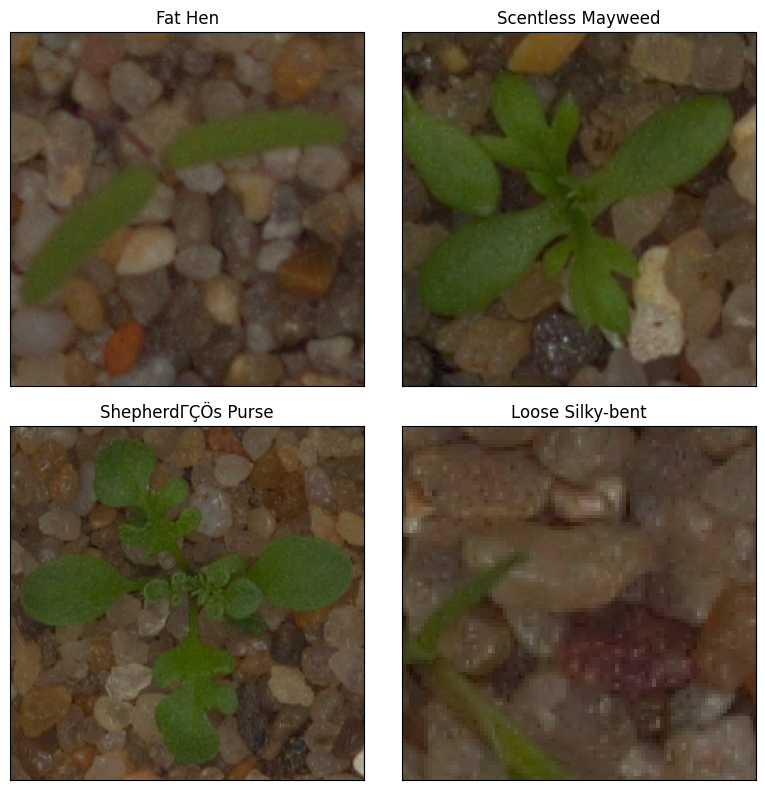

In [8]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
for i, ax in enumerate(axes.flat):
  ax.imshow(imageio.imread(data.Images[i]))
  ax.set_title(data.Labels[i])
  ax.set_xticks([])
  ax.set_yticks([])
plt.tight_layout()
plt.show()

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet50,preprocess_input
import cv2
import matplotlib.pyplot as plt
from keras import backend as K
%matplotlib inline


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1,validation_split = 0.1)

test_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1) 

In [29]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    data, 
    train_size=0.9, 
    shuffle=True, 
    random_state=42,
    stratify=data[["Labels"]]
)

train = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col="Images",
    y_col="Labels",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='training',
    rotation_range=32,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    sheer_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

validation = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col="Images",
    y_col="Labels",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='validation',
    rotation_range=32,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    sheer_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

test = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col="Images",
    y_col="Labels",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)

Found 8973 validated image filenames belonging to 12 classes.
Found 997 validated image filenames belonging to 12 classes.
Found 1108 validated image filenames belonging to 12 classes.


In [ ]:
base_model_resnet = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=train_df)


In [ ]:
#Defining and Adding layers
model_resnet=Sequential()
#Add the Dense layers along with activation and batch normalization
model_resnet.add(base_model_resnet)
model_resnet.add(Flatten())

In [11]:

from keras.applications.resnet import ResNet50,preprocess_input

mobilenet_ = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    alpha=1.0,
    weights='imagenet',
    pooling='avg'

    

mobilenet_.trainable = False

In [12]:

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
# building the Predictor layers
x = Dense(256, activation='relu')(mobilenet_.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)

outputs = Dense(12, activation='softmax')(x)

mobilenet = Model(inputs=mobilenet_.inputs, outputs=outputs)

mobilenet.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy()]
)

In [13]:
CHECKPOINTS = Path(r"C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive")
CHECKPOINTS.mkdir(exist_ok=True)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# training
results = mobilenet.fit(
    train,
    validation_data = validation,
    batch_size = 32,
    epochs = 20,
    callbacks = [
        EarlyStopping(
            monitor="val_loss",
            patience=4,
            restore_best_weights=True
        ), 
        ReduceLROnPlateau(patience=2),
        ModelCheckpoint(
            str(CHECKPOINTS),
            monitor="val_loss",
            save_best_only=True
        ),
    ]
)


Epoch 1/20
281/281 [==============================] - ETA: 0s - loss: 1.0732 - categorical_accuracy: 0.6382

INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


281/281 [==============================] - 200s 685ms/step - loss: 1.0732 - categorical_accuracy: 0.6382 - val_loss: 0.4966 - val_categorical_accuracy: 0.8265 - lr: 0.0010
Epoch 2/20
281/281 [==============================] - ETA: 0s - loss: 0.5257 - categorical_accuracy: 0.8171

INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


281/281 [==============================] - 162s 578ms/step - loss: 0.5257 - categorical_accuracy: 0.8171 - val_loss: 0.3918 - val_categorical_accuracy: 0.8706 - lr: 0.0010
Epoch 3/20
281/281 [==============================] - ETA: 0s - loss: 0.3617 - categorical_accuracy: 0.8734

INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


281/281 [==============================] - 163s 581ms/step - loss: 0.3617 - categorical_accuracy: 0.8734 - val_loss: 0.3171 - val_categorical_accuracy: 0.8877 - lr: 0.0010
Epoch 4/20
281/281 [==============================] - ETA: 0s - loss: 0.2689 - categorical_accuracy: 0.9024

INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


281/281 [==============================] - 163s 582ms/step - loss: 0.2689 - categorical_accuracy: 0.9024 - val_loss: 0.2472 - val_categorical_accuracy: 0.9218 - lr: 0.0010
Epoch 5/20
281/281 [==============================] - ETA: 0s - loss: 0.2118 - categorical_accuracy: 0.9266

INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


281/281 [==============================] - 168s 598ms/step - loss: 0.2118 - categorical_accuracy: 0.9266 - val_loss: 0.2310 - val_categorical_accuracy: 0.9178 - lr: 0.0010
Epoch 6/20
281/281 [==============================] - ETA: 0s - loss: 0.1932 - categorical_accuracy: 0.9348

INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


281/281 [==============================] - 217s 771ms/step - loss: 0.1932 - categorical_accuracy: 0.9348 - val_loss: 0.2056 - val_categorical_accuracy: 0.9178 - lr: 0.0010
Epoch 7/20
281/281 [==============================] - 187s 665ms/step - loss: 0.1399 - categorical_accuracy: 0.9496 - val_loss: 0.2594 - val_categorical_accuracy: 0.9097 - lr: 0.0010
Epoch 8/20
281/281 [==============================] - ETA: 0s - loss: 0.1140 - categorical_accuracy: 0.9595

INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


281/281 [==============================] - 252s 899ms/step - loss: 0.1140 - categorical_accuracy: 0.9595 - val_loss: 0.1669 - val_categorical_accuracy: 0.9509 - lr: 0.0010
Epoch 9/20
281/281 [==============================] - ETA: 0s - loss: 0.1086 - categorical_accuracy: 0.9628

INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


281/281 [==============================] - 245s 871ms/step - loss: 0.1086 - categorical_accuracy: 0.9628 - val_loss: 0.1626 - val_categorical_accuracy: 0.9408 - lr: 0.0010
Epoch 10/20
281/281 [==============================] - ETA: 0s - loss: 0.1126 - categorical_accuracy: 0.9623

INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


281/281 [==============================] - 223s 792ms/step - loss: 0.1126 - categorical_accuracy: 0.9623 - val_loss: 0.1543 - val_categorical_accuracy: 0.9438 - lr: 0.0010
Epoch 11/20
281/281 [==============================] - ETA: 0s - loss: 0.0764 - categorical_accuracy: 0.9740

INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


281/281 [==============================] - 223s 792ms/step - loss: 0.0764 - categorical_accuracy: 0.9740 - val_loss: 0.1280 - val_categorical_accuracy: 0.9599 - lr: 0.0010
Epoch 12/20
281/281 [==============================] - 230s 818ms/step - loss: 0.0583 - categorical_accuracy: 0.9794 - val_loss: 0.1848 - val_categorical_accuracy: 0.9529 - lr: 0.0010
Epoch 13/20
281/281 [==============================] - 181s 643ms/step - loss: 0.0667 - categorical_accuracy: 0.9756 - val_loss: 0.2136 - val_categorical_accuracy: 0.9428 - lr: 0.0010
Epoch 14/20
281/281 [==============================] - ETA: 0s - loss: 0.0244 - categorical_accuracy: 0.9932

INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


281/281 [==============================] - 164s 583ms/step - loss: 0.0244 - categorical_accuracy: 0.9932 - val_loss: 0.1039 - val_categorical_accuracy: 0.9719 - lr: 1.0000e-04
Epoch 15/20
281/281 [==============================] - ETA: 0s - loss: 0.0135 - categorical_accuracy: 0.9972

INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


INFO:tensorflow:Assets written to: C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\assets


281/281 [==============================] - 161s 574ms/step - loss: 0.0135 - categorical_accuracy: 0.9972 - val_loss: 0.1015 - val_categorical_accuracy: 0.9769 - lr: 1.0000e-04
Epoch 16/20
281/281 [==============================] - 138s 492ms/step - loss: 0.0111 - categorical_accuracy: 0.9978 - val_loss: 0.1039 - val_categorical_accuracy: 0.9749 - lr: 1.0000e-04
Epoch 17/20
281/281 [==============================] - 143s 508ms/step - loss: 0.0088 - categorical_accuracy: 0.9988 - val_loss: 0.1023 - val_categorical_accuracy: 0.9739 - lr: 1.0000e-04
Epoch 18/20
281/281 [==============================] - 134s 475ms/step - loss: 0.0079 - categorical_accuracy: 0.9984 - val_loss: 0.1025 - val_categorical_accuracy: 0.9739 - lr: 1.0000e-05
Epoch 19/20
281/281 [==============================] - 132s 470ms/step - loss: 0.0075 - categorical_accuracy: 0.9989 - val_loss: 0.1027 - val_categorical_accuracy: 0.9739 - lr: 1.0000e-05


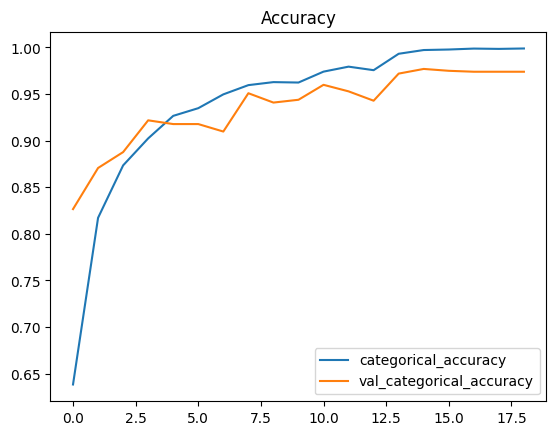

In [16]:
pd.DataFrame(results.history)[['categorical_accuracy', 'val_categorical_accuracy']].plot()
plt.title("Accuracy")
plt.show()


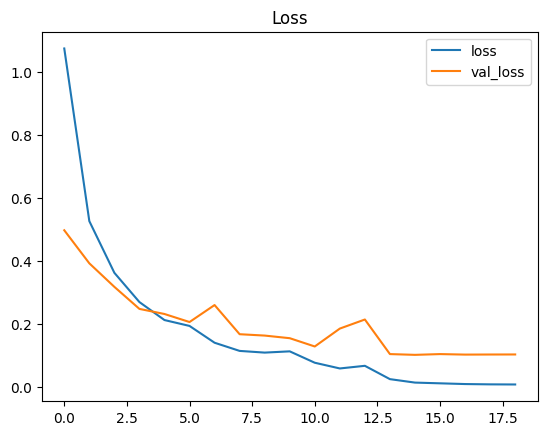

In [17]:
pd.DataFrame(results.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()

In [18]:
MODEL_PATH = Path("./saved_model")
MODEL_PATH.mkdir(exist_ok=True)
mobilenet.save(str(MODEL_PATH))

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


In [19]:
# dump the training history as well
np.save('model_history.npy', results.history)

# history=np.load('model_history.npy',allow_pickle='TRUE').item()

In [20]:
results = mobilenet.evaluate(test)

35/35 [==============================] - 19s 525ms/step - loss: 0.1196 - categorical_accuracy: 0.9702


In [21]:
predictions = np.argmax(mobilenet.predict(test), axis=1)

35/35 [==============================] - 16s 403ms/step


In [22]:
from sklearn.metrics import classification_report
labels = dict((v, k) for k, v in train.class_indices.items())
actual = list(test_df.Labels)
predictions = [labels[i] for i in predictions]
print(classification_report(actual, predictions))

                           precision    recall  f1-score   support

              Black-grass       0.85      0.94      0.89        62
                 Charlock       0.97      1.00      0.98        90
                 Cleavers       1.00      1.00      1.00        67
         Common Chickweed       0.98      0.99      0.98       143
             Common wheat       0.96      0.94      0.95        51
                  Fat Hen       0.98      0.97      0.98       108
         Loose Silky-bent       0.97      0.95      0.96       152
                    Maize       0.98      0.98      0.98        51
        Scentless Mayweed       0.95      0.98      0.96       121
       ShepherdΓÇÖs Purse       0.98      0.91      0.94        55
Small-flowered Cranesbill       1.00      0.97      0.98       115
               Sugar beet       1.00      1.00      1.00        93

                 accuracy                           0.97      1108
                macro avg       0.97      0.97      0.97    

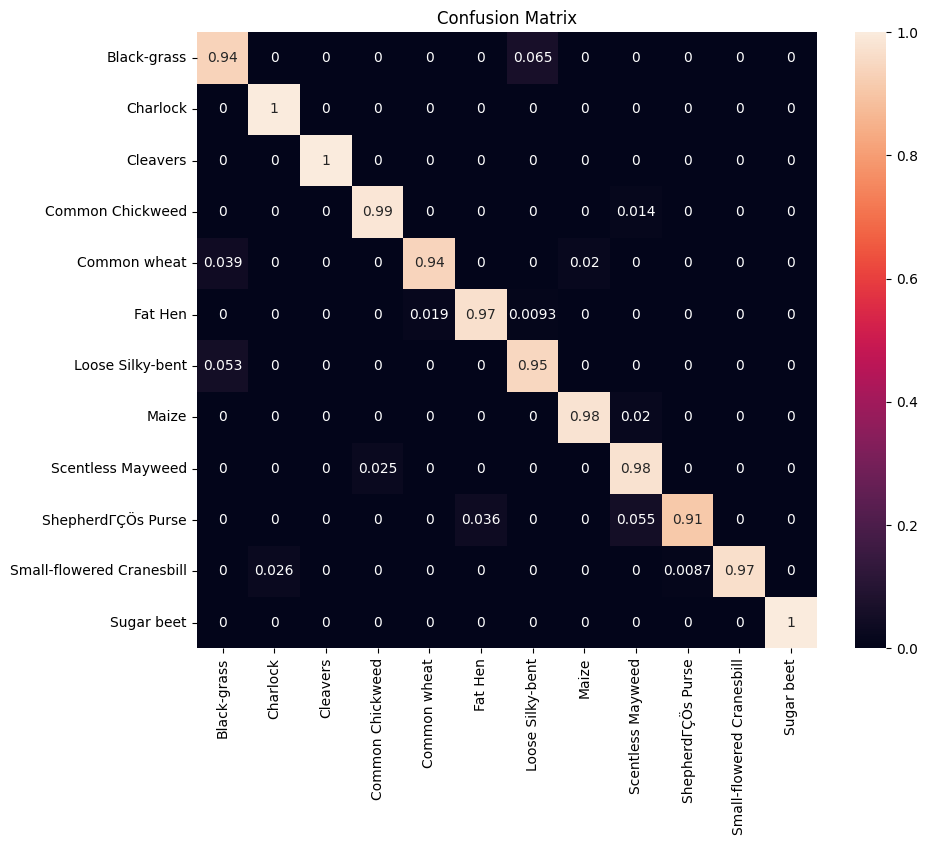

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(actual, predictions, normalize = "true")
plt.figure(figsize=(10, 8))
sns.heatmap(cf, annot=True, xticklabels = sorted(set(actual)), yticklabels = sorted(set(actual)))
plt.title('Confusion Matrix')
plt.show()

In [31]:
pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ------------------ ------------------- 143.4/293.3 kB 2.9 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
from keras.models import model_from_json
import json

# Saving the Model :

In [44]:
model_json = mobilenet.to_json()
with open(r"C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\model1.json","w") as json_file:
    json_file.write(model_json)
mobilenet.save_weights("amodel.h5")
print("Saved model")

Saved model


# Loading the Model :

In [45]:
#loading saved model

json_file = open(r"C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\model1.json")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#load weights into new model
loaded_model.load_weights("amodel.h5")
print("Loaded model")

Loaded model


In [46]:
#predictiong using loaded model
loaded_model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# PREDICTION

In [47]:
import cv2

In [64]:
#image = cv2.imread(r"C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\Loose Silky-bent\3.png")
image = cv2.imread(r"C:\Users\91630\Dropbox\My PC (LAPTOP-NVE64E71)\Desktop\archive\Maize\55.png")

image = cv2.resize(image, (224,224))
np_image = np.array(image)
y = np.expand_dims(np_image, axis=0)
pred = loaded_model.predict(y)
print(pred)
pred.shape

print(image.shape)

1/1 [==============================] - 0s 36ms/step
[[1.48684174e-01 2.58008640e-07 5.71818134e-07 5.56615396e-06
  1.99976989e-06 4.11958490e-06 8.51278126e-01 3.41943360e-06
  1.73067074e-05 2.96503026e-06 1.31734259e-06 1.14900175e-07]]
(224, 224, 3)


In [3]:
y_pred_binary = pred.argmax(axis=1)


if y_pred_binary==[0]:
    print("Black-Grass")
elif y_pred_binary==[1]:
    print("Charlock") 
elif y_pred_binary==[2]:
    print("Cleavers") 
elif y_pred_binary==[3]:
    print("Common Chickweed") 
elif y_pred_binary==[4]:
    print("Common Wheat") 
elif y_pred_binary==[5]:
    print("Fat Hen") 
elif y_pred_binary==[6]:
    print("Maize") 
elif y_pred_binary==[7]:
    print("Loose silky-bent") 
elif y_pred_binary==[8]:
    print("Scentless Mayweed") 
elif y_pred_binary==[9]:
    print("Shepherd's Purse") 
elif y_pred_binary==[10]:
    print("Small-flowered Cranesbill") 
elif y_pred_binary==[11]:
    print("Sugar beet") 


Maize
